In [6]:
#importing libraries
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

In [7]:
state = pd.read_csv("data/state.csv")

In [8]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [9]:
#mean
np.mean(state["Population"])

6162876.3

In [11]:
state['Population'].mean()

6162876.3

In [12]:
#trimmed mean
print(trim_mean(state['Population'],0.1))

4783697.125


In [13]:
#median
np.median(state['Population'])

4436369.5

## Distribution of data

In [14]:
#standard deviation
state['Population'].std()

6848235.347401142

In [15]:
#Inter quantile range
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

<AxesSubplot:ylabel='Frequency'>

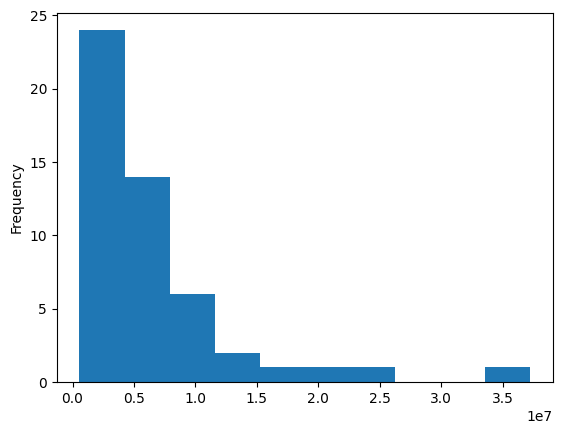

In [16]:
state['Population'].plot(kind='hist')

<AxesSubplot:xlabel='Population', ylabel='Count'>

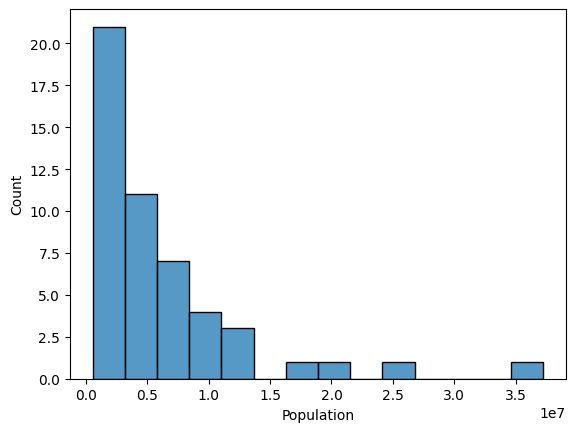

In [17]:
sns.histplot(state['Population'])

In [18]:
robust.scale.mad(state['Population'])

3849876.1459979336

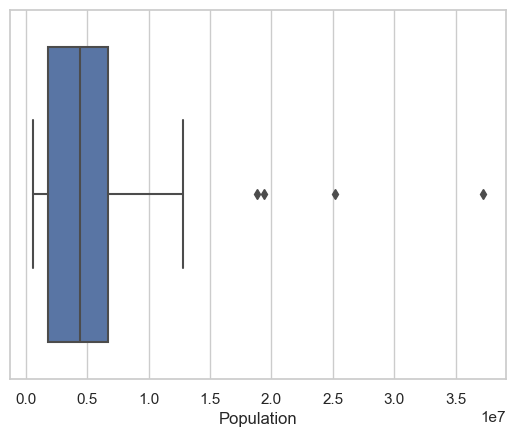

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=state['Population'])

Text(0.5, 0, 'Murder Rate per 100,000')

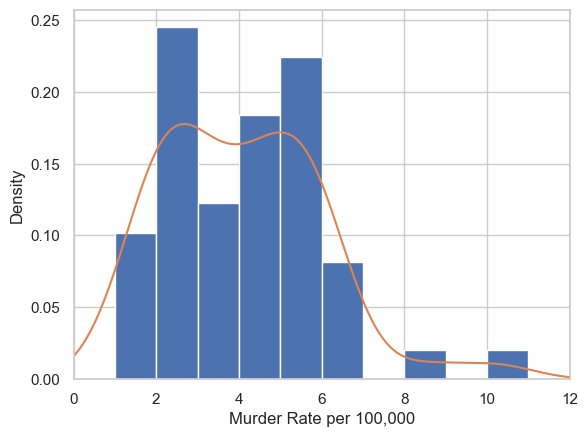

In [25]:
#density plot
ax = state["Murder.Rate"].plot.hist(density=True,
                                    xlim=[0,12], 
                                    bins = range(1,12))

state["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate per 100,000")

In [21]:
#frequency table
binned_population = pd.cut(state['Population'],10)
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population in millions')

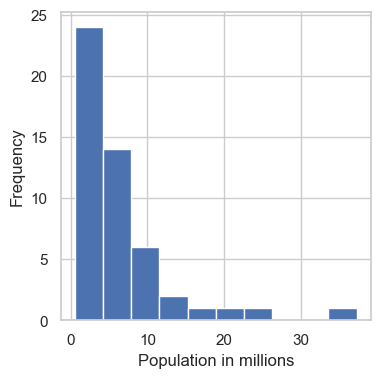

In [24]:
#histogram
ax = (state['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Population in millions")

## Categorical data

In [27]:
dfw = pd.read_csv("data/dfw_airline.csv")

In [28]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [29]:
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [30]:
dfw.sum(axis=1)

0    279126.05
dtype: float64

Text(0, 0.5, 'Count')

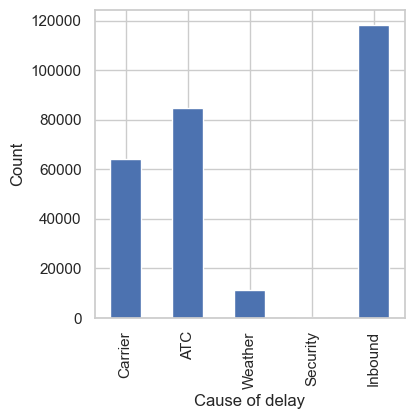

In [32]:
ax = dfw.T.plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel('Count')

## Correlation

In [42]:
sp500_sym = pd.read_csv("data/sp500_sectors.csv")

In [43]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [44]:
sp500_sym.columns

Index(['sector', 'sector_label', 'sub_sector', 'symbol'], dtype='object')

## Comparing two or more variables

In [48]:
kc_tax = pd.read_csv("data/kc_tax.csv.gz")
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [49]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500),:]

kc_tax0.shape

(432693, 3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


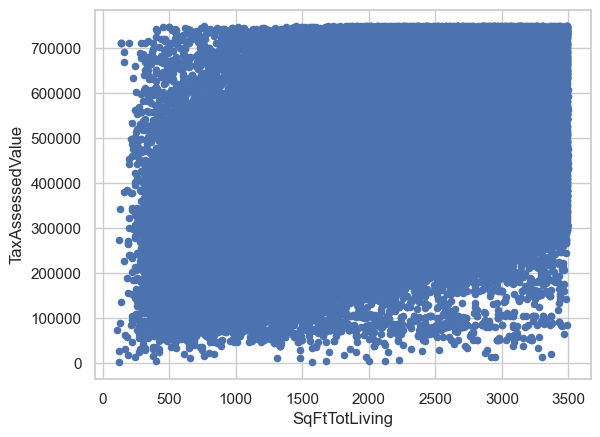

In [52]:
ax = kc_tax0.plot.scatter(x='SqFtTotLiving',
                         y='TaxAssessedValue')

### That is why we use hexagonal binning

Text(0, 0.5, 'Tax-Assessed Value')

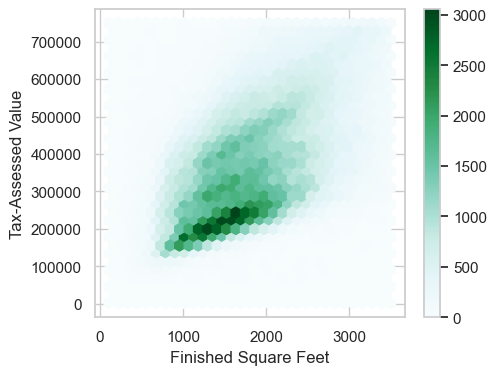

In [53]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving',
                         y='TaxAssessedValue',
                         gridsize = 30,
                         sharex = False,
                         figsize=(5,4))

ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-Assessed Value")

In [55]:
#contour plot
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, ax = ax)
ax.set_xlabel('Finished Sqare Feet')
ax.set_ylabel('Tax-Assessed Value')
ax.show()

/Users/yogeshtak/Documents/Python3/datascience_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'show'